In [1]:
import torch

In [64]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)
f = u*v + (u*v)**2

f.backward()
print(u,v,f,u.grad)

tensor(2., requires_grad=True) tensor(1., requires_grad=True) tensor(6., grad_fn=<AddBackward0>) tensor(5.)


In [67]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2
y.backward()
print(x,y,x.grad)

tensor(2., requires_grad=True) tensor(4., grad_fn=<PowBackward0>) tensor(4.)


In [68]:
v = torch.tensor(3.0,requires_grad=True)
z = v ** 2
print(z)

z.backward()

print('data:',z.data)
print('grad_fn:',z.grad_fn)
print('grad:',z.grad)
print("is_leaf:",z.is_leaf)
print("requires_grad:",z.requires_grad)

tensor(9., grad_fn=<PowBackward0>)
data: tensor(9.)
grad_fn: <PowBackward0 object at 0x7fdcbeeaff40>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-68-213cac7db0a4>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print('grad:',z.grad)


In [71]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print(y)
y.backward()
print(x.grad)

tensor(9., grad_fn=<AddBackward0>)
tensor(6.)


In [72]:
x = torch.tensor(1., requires_grad=True)
y = 2*x**3 + x
y.backward()
print(y,x,x.grad)

tensor(3., grad_fn=<AddBackward0>) tensor(1., requires_grad=True) tensor(7.)


In [73]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [74]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [ ]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

In [77]:
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print(f)

f.backward()
print(u.grad)
print(v.grad)

tensor(3., grad_fn=<AddBackward0>)
tensor(4.)
tensor(1.)


In [ ]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True) tensor(407.4074, grad_fn=<SumBackward0>)


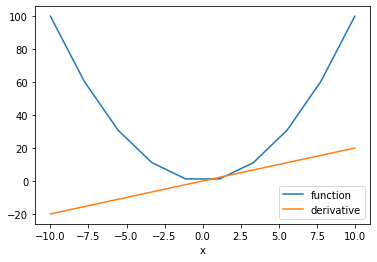

In [80]:
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)
print(x,y)

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

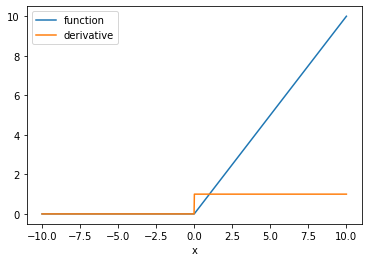

In [81]:
import torch 
import matplotlib.pylab as plt

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [82]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)
f = u*v + (u*v)**2

f.backward()
print(u,v,f,u.grad)

tensor(2., requires_grad=True) tensor(1., requires_grad=True) tensor(6., grad_fn=<AddBackward0>) tensor(5.)


In [56]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 3 * torch.ones(length, 3)
        self.y = 1 *torch.ones(length, 2)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [57]:
class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 3, muly = 3):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [59]:
transform_dataset = toy_set(transform = add_mult())
data_set = toy_set()

for i in range(5):
    print(data_set[i])
    print(transform_dataset[i])

(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))


In [88]:
class addmultiply(object):
    def __init__(self, add = 2, multiply = 2):
        self.add = add
        self.multiply = multiply
        
    def __call__(self,sample):
        sample = sample[0] + self.add, sample[1] * self.multiply
        return sample
        
dataset2 = toy_set(transform = addmultiply())
for i in range(3):
    print(dataset2[i])

(tensor([5., 5., 5.]), tensor([2., 2.]))
(tensor([5., 5., 5.]), tensor([2., 2.]))
(tensor([5., 5., 5.]), tensor([2., 2.]))


In [89]:
from torchvision import transforms
composed = transforms.Compose([addmultiply(), add_mult()])
dataset3 = toy_set(transform = composed)
for i in range(3):
    print(dataset3[i])

(tensor([8., 8., 8.]), tensor([6., 6.]))
(tensor([8., 8., 8.]), tensor([6., 6.]))
(tensor([8., 8., 8.]), tensor([6., 6.]))


In [2]:
a=torch.tensor([7,4,3,2,1])
print(a, a.dtype, a.type())

tensor([7, 4, 3, 2, 1]) torch.int64 torch.LongTensor


In [28]:
b=torch.FloatTensor([0,1,2,3,4])
print(b, b.dtype, b.type())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor


In [4]:
c=b.type(torch.LongTensor)
print(c, c.dtype, c.type(), c.size(), c.ndimension())

tensor([0, 1, 2, 3, 4]) torch.int64 torch.LongTensor torch.Size([5]) 1


In [44]:
a_col = c.view(5,1)
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0],
        [1],
        [2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([5, 1]) 2


In [27]:
a_col = torch.reshape(c,(1,5))
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0, 1, 2, 3, 4]]) torch.int64 torch.LongTensor torch.Size([1, 5]) 2


In [7]:
print(a_col[0].item())

0


In [8]:
b_col = a_col[1:4]
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[1],
        [2],
        [3]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [9]:
b_col = a_col[1:4] + 1
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [46]:
z = b_col * a_col.T // hadamard product
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())

tensor([[ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12],
        [ 0,  4,  8, 12, 16]]) torch.int64 torch.LongTensor torch.Size([3, 5]) 2 15


In [25]:
u = a_col[1:3]
u = torch.reshape(u, (1,-1))
print(u, u.dtype, u.type(), u.size(), u.ndimension())


tensor([[1, 2]]) torch.int64 torch.LongTensor torch.Size([1, 2]) 2


In [32]:
print(b, b.dtype, b.type(), b.size(), b.ndimension())
v = torch.dot(b,b) // shows how two are similar
print(v, v.dtype, v.type(), v.size(), v.ndimension())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor torch.Size([5]) 1
tensor(30.) torch.float32 torch.FloatTensor torch.Size([]) 0


In [33]:
mean = b.mean()
max = b.max()
print(mean,max)

tensor(2.) tensor(4.)


In [36]:
import numpy as np
x = torch.tensor([0,np.pi/2,np.pi])
y = torch.cos(x)
print(y)

tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00])


In [37]:
series = torch.linspace(-2,2,steps=5)
print(series)

tensor([-2., -1.,  0.,  1.,  2.])


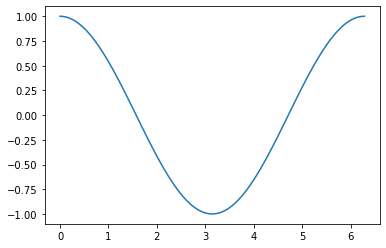

In [42]:
series = torch.linspace(0,np.pi*2,100)
y = torch.cos(series)

import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(series.numpy(), y.numpy())

In [48]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = torch.tensor([[1,1],[1,1],[-1,1]])
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[0, 2],
        [0, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [50]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[2, 1],
        [1, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [51]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.dot(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


RuntimeError: 1D tensors expected, got 2D, 2D tensors at /pytorch/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83